In [1]:
%config InlineBackend.figure_format = 'retina'
from micecat_field import *

ra_arr = np.arange(32,59,2)[::2]
dec_arr = np.arange(2,29,3)[::2]
dec_grid, ra_grid = np.meshgrid(dec_arr, ra_arr)
ra_arr, dec_arr = ra_grid.flatten(), dec_grid.flatten()

bandwl_dict = {'euclid_nisp_y':1.073286}
abs_mag_cut = -18

***

/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:70: RuntimeWarning: invalid value encountered in double_scalars


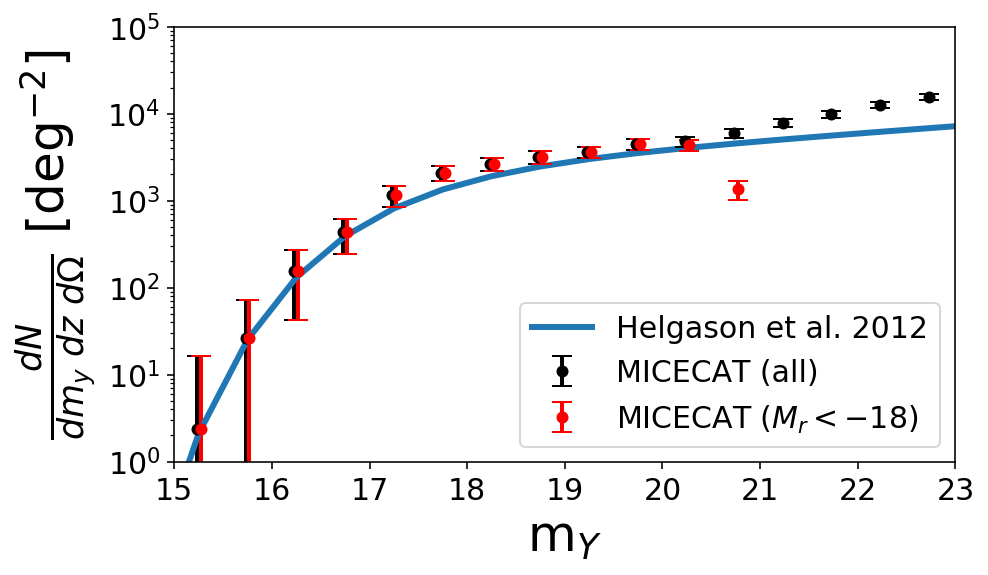

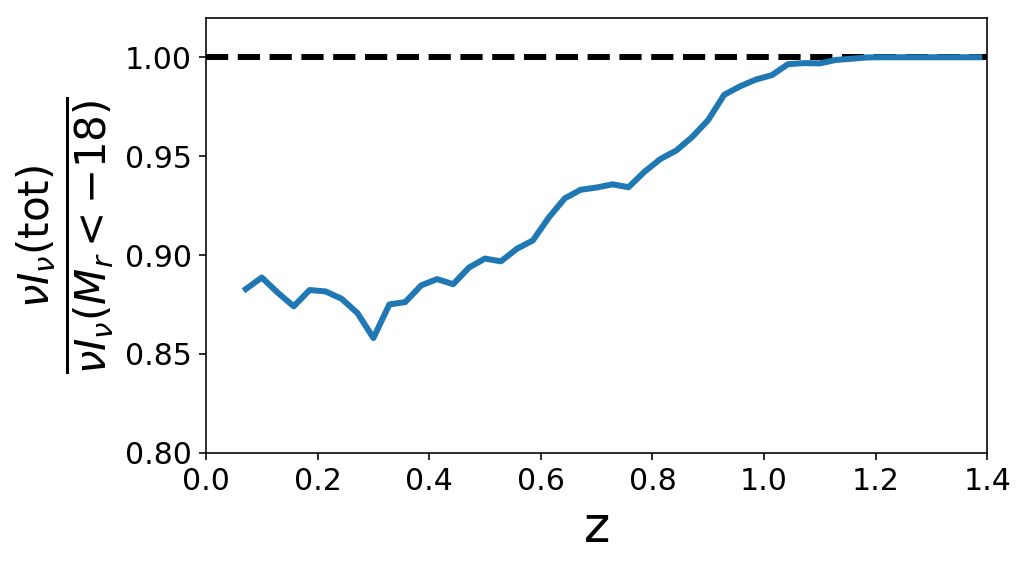

In [29]:
# z_min, z_max = 0.197, 0.203
# z_mid = (z_min + z_max) / 2
# Omega_cat = 4

# mbinedges = np.arange(14, 28, 0.5)
# mbins = (mbinedges[1:] + mbinedges[:-1]) / 2
# dm = mbinedges[1] - mbinedges[0]

# phi_mc = 0
# phi_mc_tot = 0
# for i in range(len(ra_arr)):
#     print(i)
#     mcfield = micecat_field(ra_arr[i], dec_arr[i])
#     df = mcfield.get_micecat_df(add_fields=['sdss_r_abs_mag', 'euclid_nisp_y_true'])
#     dfi = df[(df.z_cgal >= z_min) & (df.z_cgal < z_max)]
#     m = dfi['euclid_nisp_y_true'].values
#     phi_mci = np.histogram(m, bins=mbinedges)[0]
#     phi_mc_tot += phi_mci

#     dfi = df[(df.z_cgal >= z_min) & (df.z_cgal < z_max) \
#              & (df.sdss_r_abs_mag <= abs_mag_cut)]
#     m = dfi['euclid_nisp_y_true'].values
#     phi_mci = np.histogram(m, bins=mbinedges)[0]
#     phi_mc += phi_mci
# phi_mc_tot = phi_mc_tot/len(ra_arr)
# phi_mc = phi_mc/len(ra_arr)

# phi_mc_tot_err = np.sqrt(phi_mc_tot)
# phi_mc_tot = phi_mc_tot/dm/(z_max-z_min)/Omega_cat
# phi_mc_tot_err = phi_mc_tot_err/dm/(z_max-z_min)/Omega_cat

# phi_mc_err = np.sqrt(phi_mc)
# phi_mc = phi_mc/dm/(z_max-z_min)/Omega_cat
# phi_mc_err = phi_mc_err/dm/(z_max-z_min)/Omega_cat
# clear_output()

fig, ax = plt.subplots(1,1,figsize=(7,4))

band = 'euclid_nisp_y'
sp = np.where(dfi['sdss_r_abs_mag'].values < -18)[0]
bandwl = bandwl_dict[band]
dN_dm_ddeg2h = [Helgason_model().dN_dsr(bandwl,zmin=z_min,zmax=z_max,m_min=m_min,m_max=m_max) \
                for m_min, m_max in zip(mbinedges[:-1],mbinedges[1:])]
dN_dm_ddeg2h = np.array(dN_dm_ddeg2h) / (z_max - z_min)
dN_dm_ddeg2h = np.array(dN_dm_ddeg2h) / np.diff(mbinedges) / (u.sr).to(u.deg**2)
ax.semilogy(mbins, dN_dm_ddeg2h,'C0', lw=3, label='Helgason et al. 2012')
ax.errorbar(mbins-0.02, phi_mc_tot, phi_mc_tot_err, label='MICECAT (all)',
               color='k', capsize=5, markersize=10, elinewidth=2, markeredgewidth=1, fmt='.')
ax.errorbar(mbins+0.02, phi_mc, phi_mc_err, label=r'MICECAT ($M_r < -18$)',
               color='r', capsize=5, markersize=10, elinewidth=2, markeredgewidth=1, fmt='.')
ax.set_ylim([1e0,1e5])
ax.set_xlim([15,23])
ax.set_yscale('log')
ax.set_ylabel(r'$\frac{dN}{dm_{y}\,\,dz\,\,d\Omega}$' +r' [deg$^{-2}$]',fontsize=25)
ax.set_xlabel(r'm$_Y$', fontsize=25)
ax.legend(fontsize=15, loc=4)
ax.tick_params(labelsize=15)
plt.savefig('plots/MICECAT_paperfig/MICECAT_LF.pdf',dpi=100, bbox_inches='tight')

fig, ax = plt.subplots(1,1,figsize=(7,4))
zbinedges = np.linspace(0,1.4,50)
zbins = (zbinedges[1:] + zbinedges[:-1]) / 2
dz = zbinedges[1] - zbinedges[0]
r_arr = np.zeros_like(zbins)
for i in range(len(zbins)):
    dfi = df[(df.z_cgal >= zbinedges[i]) & (df.z_cgal < zbinedges[i+1]) \
             & (df.sdss_r_abs_mag <= abs_mag_cut)]
    F = np.sum(10**(-dfi['euclid_nisp_y_true'].values/2.5))
    dfi = df[(df.z_cgal >= zbinedges[i]) & (df.z_cgal < zbinedges[i+1])]
    m = dfi['euclid_nisp_y_true'].values
    F_tot = np.sum(10**(-dfi['euclid_nisp_y_true'].values/2.5))
    r_arr[i] = F/F_tot
ax.axhline(1, c='k', ls='--', lw=3)
ax.plot(zbins, r_arr, lw=3)
ax.set_ylabel(r'$\frac{\nu I_\nu ({\rm tot})}{\nu I_\nu (M_r < -18)}$',fontsize=30)
ax.set_xlabel(r'z', fontsize=25)
ax.set_ylim([0.8,1.02])
ax.set_xlim([0,1.4])
ax.tick_params(labelsize=15)
plt.savefig('plots/MICECAT_paperfig/MICECAT_LF_int.pdf',dpi=100, bbox_inches='tight')

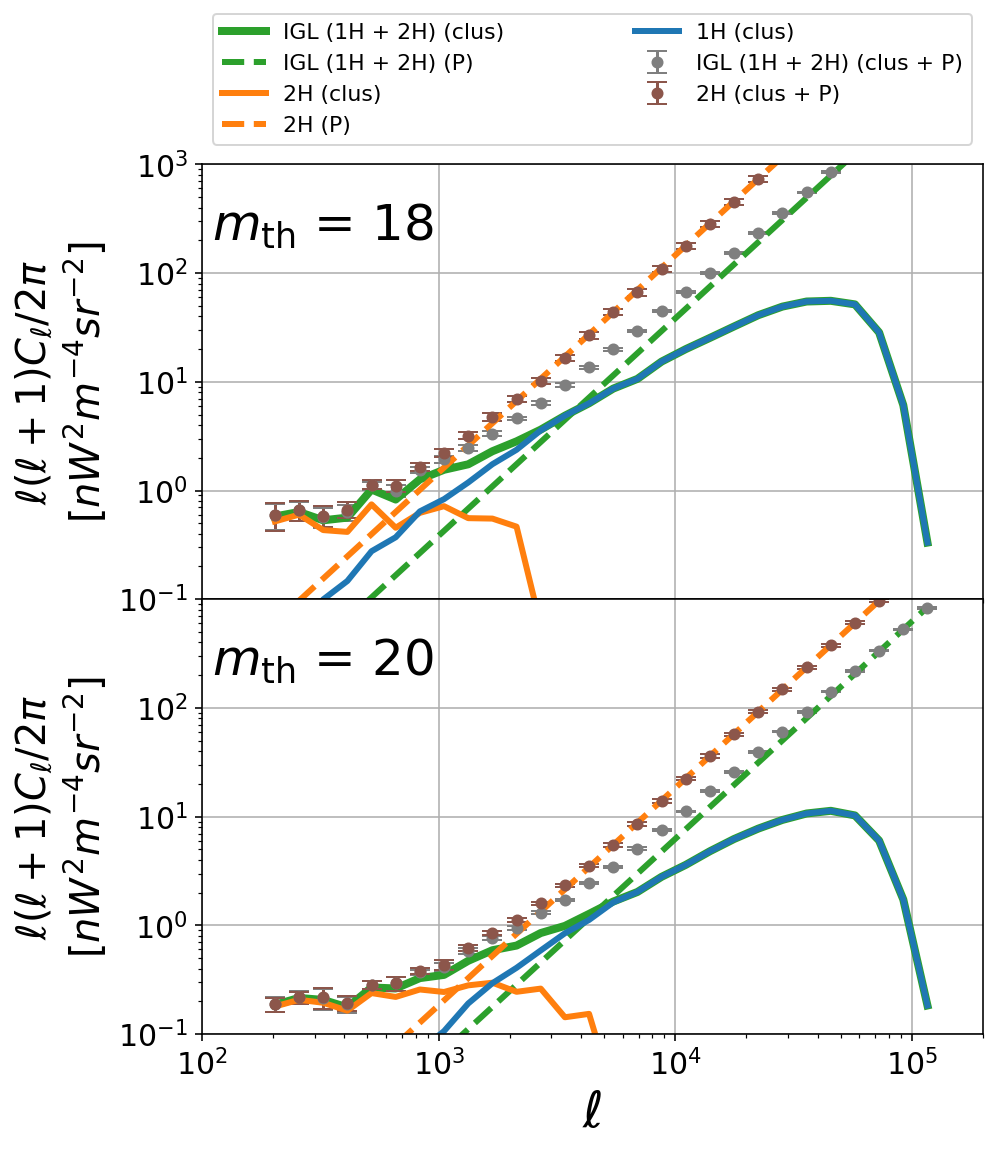

In [46]:
fig, ax = plt.subplots(2,1, figsize=(7, 8))
for i, m_th in enumerate([18,20]):
    Cl_data = get_Cl_data(ihl_model='NFW', m_th=m_th)

    l = Cl_data['l']
    Nfields = 50
    Cl2 = Cl_data['tot']['Cl2']
    Cla = Cl_data['tot']['Cla']
    Cl2_shsub = Cl2 - np.tile(np.mean(Cl2[:,-3:], axis=1), (28,1)).T
    Cla_shsub = Cla - np.tile(np.mean(Cla[:,-3:], axis=1), (28,1)).T

    Dl = l*(l+1)*np.median(Cla, axis=0)/2
    Dl_err = l*(l+1)*(np.percentile(Cla, 84, axis=0) \
                      - np.percentile(Cla, 16, axis=0))/2/np.sqrt(Nfields)
    plot_err_log(l, Dl, Dl_err, ax=ax[i], plot_xerr=False, color='C7',
                 label='IGL (1H + 2H) (clus + P)')

    Dl = l*(l+1)*np.median(Cla_shsub, axis=0)/2
    idx_cut = np.where(Dl<0)[0][0]
    spline_fit = scipy.interpolate.UnivariateSpline(np.log(l[idx_cut-4:idx_cut]),
                                                    np.log(Dl[idx_cut-4:idx_cut]))
    Dla_fit = Dl.copy()
    Dla_fit[idx_cut:] = np.exp(spline_fit(np.log(l[idx_cut:])))
    ax[i].loglog(l, Dla_fit,'C2', lw=4, label='IGL (1H + 2H) (clus)')
    Dl = l*(l+1)*np.median(Cla-Cla_shsub, axis=0)/2
    ax[i].loglog(l, Dl, 'C2--', lw=3, label='IGL (1H + 2H) (P)')

    #===========================

    Dl = l*(l+1)*np.median(Cl2, axis=0)/2
    Dl_err = l*(l+1)*(np.percentile(Cl2, 84, axis=0) \
                      - np.percentile(Cl2, 16, axis=0))/2/np.sqrt(Nfields)
    plot_err_log(l, Dl, Dl_err, ax=ax[i], plot_xerr=False, color='C5', label='2H (clus + P)')

    Dl = l*(l+1)*np.median(Cl2_shsub, axis=0)/2
    idx_cut = np.where(Dl<0)[0][0]
    spline_fit = scipy.interpolate.UnivariateSpline(np.log(l[idx_cut-4:idx_cut]),
                                                    np.log(Dl[idx_cut-4:idx_cut]))
    Dl2_fit = Dl.copy()
    Dl2_fit[idx_cut:] = np.exp(spline_fit(np.log(l[idx_cut:])))
    ax[i].loglog(l, Dl2_fit,'C1', lw=3, label='2H (clus)')
    Dl = l*(l+1)*np.median(Cl2-Cl2_shsub, axis=0)/2
    ax[i].loglog(l, Dl, 'C1--', lw=3, label='2H (P)')

    ax[i].loglog(l, Dla_fit - Dl2_fit,'C0', lw=3, label='1H (clus)')
    
    ax[i].set_ylim([1e-1,1e3])
    ax[i].set_xlim([1e2,2e5])
    ax[i].tick_params(labelsize=15)
    ax[i].grid()
    ax[i].text(1.1e2, 2e2, r'$m_{\rm th}$ = %d'%(m_th), fontsize=25)
ax[0].legend(fontsize=11, bbox_to_anchor=(0., 1.02, 1., 0.1), ncol=2, mode='expand')
ax[0].set_ylabel(r'$\ell(\ell+1)C_\ell/2\pi$'+'\n'+r'$[nW^{2}m^{-4} sr^{-2}]$', fontsize=20)
ax[1].set_ylabel(r'$\ell(\ell+1)C_\ell/2\pi$'+'\n'+r'$[nW^{2}m^{-4} sr^{-2}]$', fontsize=20)
ax[1].set_xlabel(r'$\ell$', fontsize=25)
ax[0].tick_params(axis='x',labelbottom=False)
ax[1].set_yticks([1e-1,1e0,1e1,1e2])
plt.subplots_adjust(hspace=0)
plt.savefig('plots/MICECAT_paperfig/IGL_Cl.pdf',dpi=100, bbox_inches='tight')

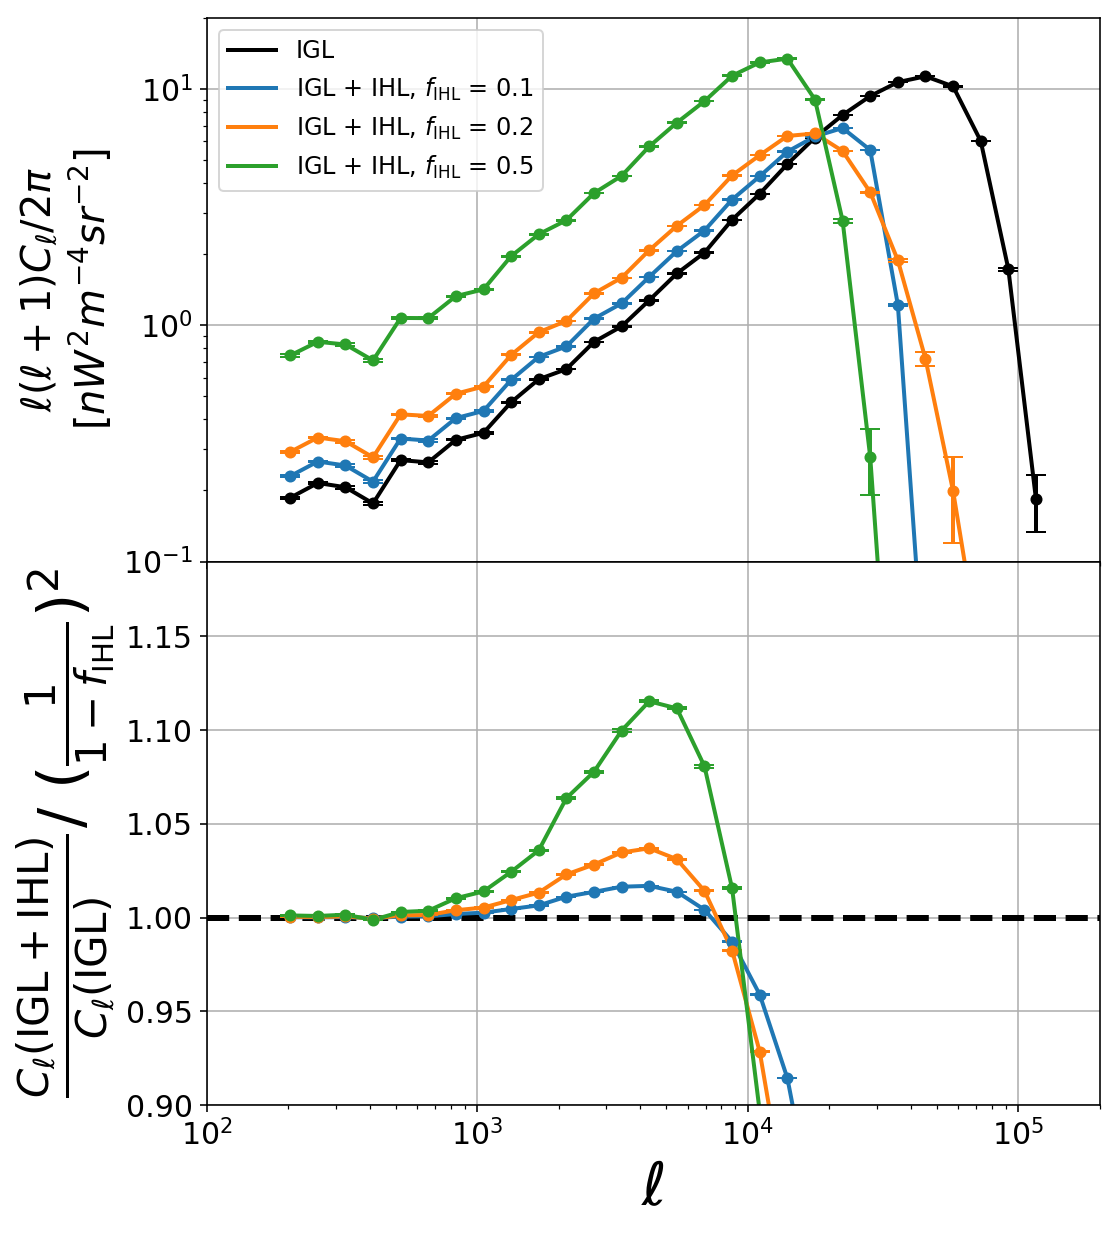

In [60]:
m_th = 20
Cl_data = get_Cl_data(ihl_model='NFW', m_th=m_th)
f_IHL_arr = [0.1, 0.2, 0.5]

fig, ax = plt.subplots(2,1,figsize=(8,10))

l = Cl_data['l']
Nfields = 50
Cla = Cl_data['tot']['Cla'].copy()
Cla_sh = np.tile(np.mean(Cla[:,-3:], axis=1), (28,1)).T
Cla_shsub = Cla - Cla_sh    
Dl = l*(l+1)*np.median(Cla_shsub, axis=0)/2
Dl_err = l*(l+1)/2*(np.percentile(Cla_shsub, 84, axis=0)-np.percentile(Cla_shsub, 16, axis=0))/2/Nfields
idx_cut = np.where(Dl<0)[0][0]
spline_fit = scipy.interpolate.UnivariateSpline(np.log(l[idx_cut-4:idx_cut]),
                                                np.log(Dl[idx_cut-4:idx_cut]))
Dla_fit = Dl.copy()
Dla_fit[idx_cut:] = np.exp(spline_fit(np.log(l[idx_cut:])))
ax[0].loglog(l, Dla_fit,'k', lw=2, label='IGL')
ax[0].errorbar(l[Dla_fit>1e-1], Dla_fit[Dla_fit>1e-1], Dl_err[Dla_fit>1e-1], c='k',
               capsize=5, markersize=10, elinewidth=2, markeredgewidth=1, fmt='.')
ax[1].axhline(1, c='k', lw=3, ls='--')
for i, f_IHL in enumerate(f_IHL_arr):
    r_IHL = f_IHL / (1 - f_IHL)
    Clah = (Cl_data['tot']['Cla'] +\
                            r_IHL**2*Cl_data['tot']['Clh'] +\
                            2*r_IHL*Cl_data['tot']['Clha'])
    Clah_shsub = Clah - Cla_sh * (1+r_IHL)**2


    Dl = l*(l+1)*np.median(Clah_shsub, axis=0)/2
    Dl_err = l*(l+1)/2*(np.percentile(Clah_shsub, 84, axis=0)-np.percentile(Clah_shsub, 16, axis=0))/2/Nfields
    idx_cut = np.where(Dl<0)[0][0]
    spline_fit = scipy.interpolate.UnivariateSpline(np.log(l[idx_cut-4:idx_cut]),
                                                    np.log(Dl[idx_cut-4:idx_cut]))
    Dlah_fit = Dl.copy()
    Dlah_fit[idx_cut:] = np.exp(spline_fit(np.log(l[idx_cut:])))

    ax[0].loglog(l, Dlah_fit,'C'+str(i), lw=2, 
                 label='IGL + IHL, ' + r'$f_{\rm IHL}$'+ ' = {}'.format(f_IHL))
    ax[0].errorbar(l[Dlah_fit>1e-1], Dlah_fit[Dlah_fit>1e-1], Dl_err[Dlah_fit>1e-1], c='C'+str(i),
                   capsize=5, markersize=10, elinewidth=2, markeredgewidth=1, fmt='.')

    r = np.median(Clah_shsub/Cla_shsub/(1+r_IHL)**2, axis=0)
    r_err = (np.percentile(Clah_shsub/Cla_shsub/(1+r_IHL)**2, 84, axis=0) \
             - np.percentile(Clah_shsub/Cla_shsub/(1+r_IHL)**2, 16, axis=0))/2/Nfields
    idx_cut = np.where(r<0)[0][0]
    spline_fit = scipy.interpolate.UnivariateSpline(np.log(l[idx_cut-4:idx_cut]),
                                                    np.log(r[idx_cut-4:idx_cut]))
    r_fit = r.copy()
    r_fit[idx_cut:] = np.exp(spline_fit(np.log(l[idx_cut:])))
    ax[1].semilogx(l, r_fit, 'C'+str(i), lw=2)
    ax[1].errorbar(l[r_fit>0.9], r_fit[r_fit>0.9], r_err[r_fit>0.9], c='C'+str(i),
                   capsize=5, markersize=10, elinewidth=2, markeredgewidth=1, fmt='.')
    
ax[0].set_ylim([1e-1,2e1])
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
ax[0].grid()
ax[1].grid()
ax[0].legend(loc=2, fontsize=12)
ax[1].set_xlabel(r'$\ell$', fontsize=30)
ax[0].set_ylabel(r'$\ell(\ell+1)C_\ell/2\pi$'+'\n'+r'$[nW^{2}m^{-4} sr^{-2}]$', fontsize=20)
ax[1].set_ylabel(r'$\frac{C_\ell{\rm (IGL + IHL)}}{C_\ell{\rm (IGL)}}$' +\
                 r'/ $(\frac{1}{1-f_{\rm IHL}})^2$', fontsize=30)
ax[0].tick_params(axis='x',labelbottom=False)
ax[1].set_ylim([0.9,1.19])
ax[0].set_xlim([1e2,2e5])
ax[1].set_xlim([1e2,2e5])
plt.subplots_adjust(hspace=0)
plt.savefig('plots/MICECAT_paperfig/IHL_Cl.pdf',dpi=100, bbox_inches='tight')

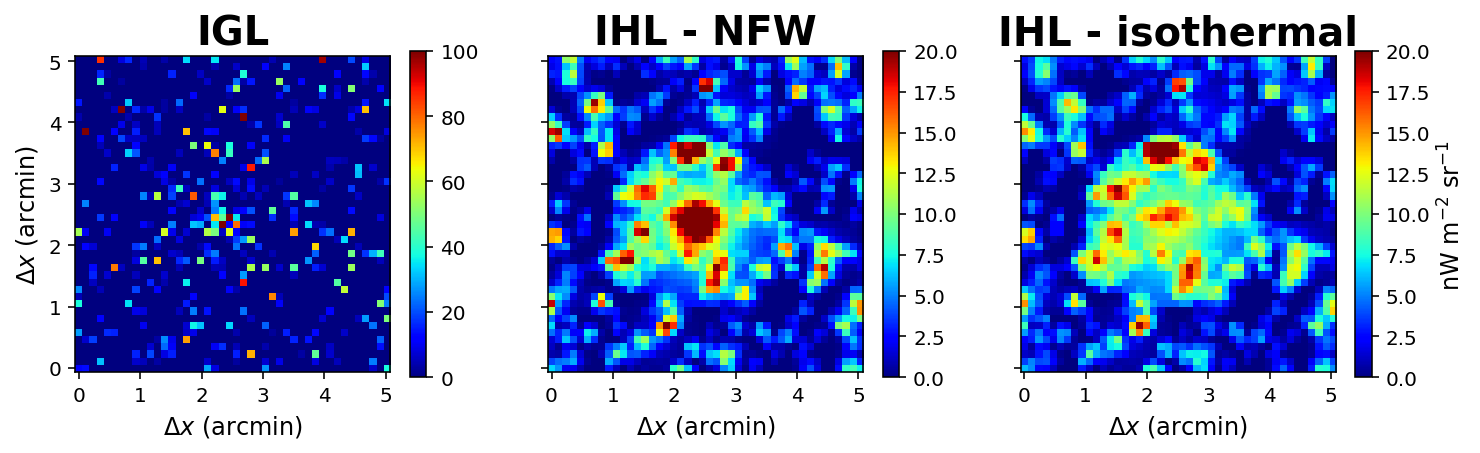

In [10]:
m_th = 20
fname = mypaths['ciberdir']+'python_ciber/stack_modelfit/micecat_IHL_data/'\
+'micecat_IHL_Cl_data_ra{}_dec{}_mth{}_mkk.pkl'\
.format(ra_arr[0], dec_arr[0], m_th)
with open(fname, "rb") as f:
    Cl_data = pickle.load(f)
    
srcmap_all = Cl_data['srcmap_all']
srcmap_allcen = Cl_data['srcmap_allcen']
ihlmap_NFW = Cl_data['ihlmap_NFW']
ihlmap_iso = Cl_data['ihlmap_iso']

fig, ax = plt.subplots(1,3,figsize=(12,3))
pixticks = np.arange(0, 43, 60/7)
pixtick_labels = ['0', '1', '2', '3', '4', '5']

p = imageclip(srcmap_all[690:734,160:204], ax=ax[0], vmin=0, vmax=100, return_objects=True)
ax[0].set_xticks(pixticks)
ax[0].set_xticklabels(pixtick_labels, fontsize=10)
ax[0].set_xlabel(r"$\Delta x$ (arcmin)", fontsize=12)
ax[0].set_ylabel(r"$\Delta x$ (arcmin)", fontsize=12)
ax[0].set_yticks(pixticks)
ax[0].set_yticklabels(pixtick_labels, fontsize=10)
ax[0].set_title('IGL', fontsize=20, weight='bold')

p = imageclip(ihlmap_NFW[690:734,160:204], ax=ax[1], vmin=0, vmax=20, return_objects=True)
ax[1].set_xticks(pixticks)
ax[1].set_xticklabels(pixtick_labels, fontsize=10)
ax[1].set_xlabel(r"$\Delta x$ (arcmin)", fontsize=12)
ax[1].set_yticks(pixticks)
ax[1].set_yticklabels(['']*len(pixticks), fontsize=10)
ax[1].set_title('IHL - NFW', fontsize=20, weight='bold')

p = imageclip(ihlmap_iso[690:734,160:204], ax=ax[2], vmin=0, vmax=20, return_objects=True)
p['cbar'].ax.set_ylabel(r'nW m$^{-2}$ sr$^{-1}$', rotation=90, fontsize=12)
ax[2].set_xticks(pixticks)
ax[2].set_xticklabels(pixtick_labels, fontsize=10)
ax[2].set_xlabel(r"$\Delta x$ (arcmin)", fontsize=12)
ax[2].set_yticks(pixticks)
ax[2].set_yticklabels(['']*len(pixticks), fontsize=10)
ax[2].set_title('IHL - isothermal', fontsize=20, weight='bold')
plt.savefig('plots/MICECAT_paperfig/IHL_prof_img.pdf',dpi=100, bbox_inches='tight')

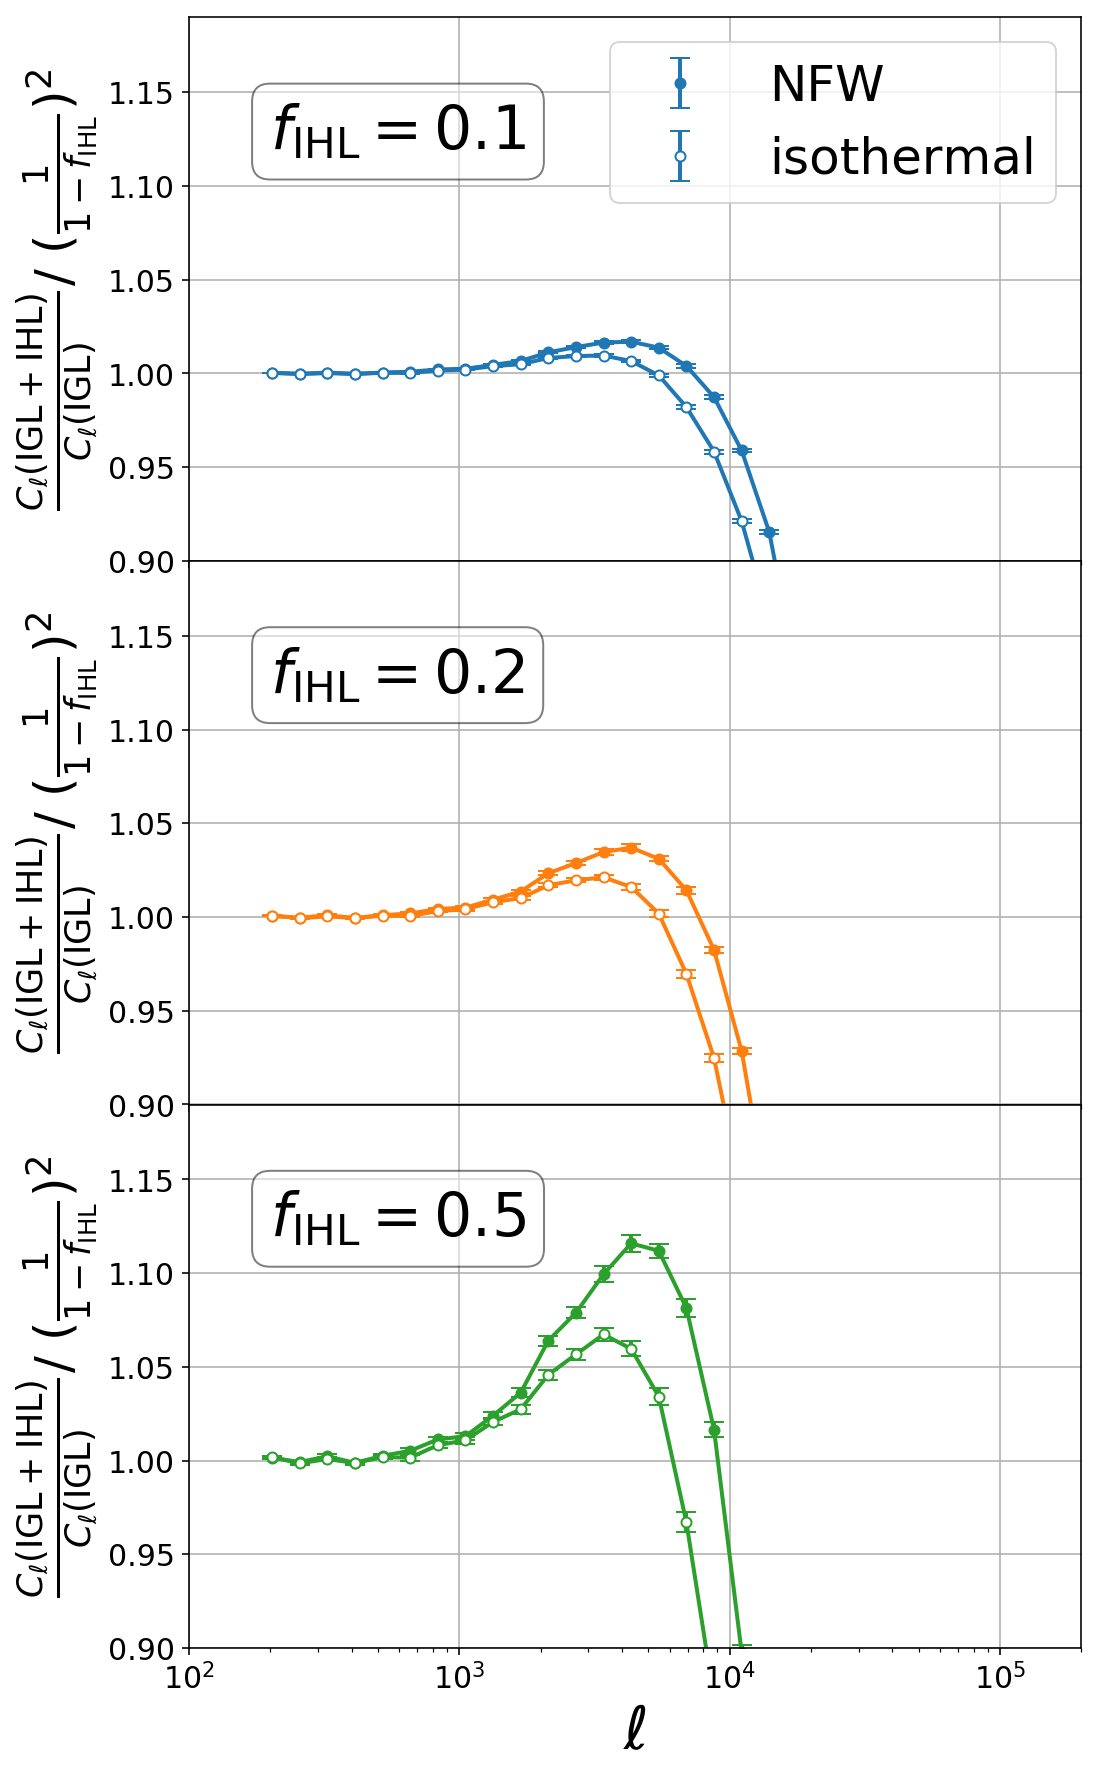

In [11]:
m_th = 20
Cl_data = get_Cl_data_ihlmodel(m_th=m_th)
f_IHL_arr = [0.1, 0.2, 0.5]

fig, ax = plt.subplots(3,1,figsize=(8,15))

for i, f_IHL in enumerate(f_IHL_arr):
    
    r_IHL = f_IHL / (1 - f_IHL)
    
    for ihlmodel,c, label in zip(['NFW', 'iso'], ['C0','C1'],['NFW', 'isothermal']):
        l = Cl_data['l']
        Nfields = Cl_data['Cl2'].shape[0]
        Cla = Cl_data['Cla'].copy()
        Cla_sh = np.tile(np.mean(Cla[:,-3:], axis=1), (28,1)).T
        Cla_shsub = Cla - Cla_sh

        Clah = (Cl_data['Cla'] +\
                                r_IHL**2*Cl_data['Clh_' + ihlmodel] +\
                                2*r_IHL*Cl_data['Clha_' + ihlmodel])
        Clah_shsub = Clah - Cla_sh * (1+r_IHL)**2

        r = np.median(Clah_shsub/Cla_shsub/(1+r_IHL)**2, axis=0)
        r_err = (np.percentile(Clah_shsub/Cla_shsub/(1+r_IHL)**2, 84, axis=0) \
        - np.percentile(Clah_shsub/Cla_shsub/(1+r_IHL)**2, 16, axis=0))/2
        r_err /= np.sqrt(200/4) # SPHEREx deep fields 200 ==> deg^2 = 50 2x2 deg fields
        idx_cut = np.where(r<0)[0][0]
        spline_fit = scipy.interpolate.UnivariateSpline(np.log(l[idx_cut-4:idx_cut]),
                                                        np.log(r[idx_cut-4:idx_cut]))
        r_fit = r.copy()
        r_fit[idx_cut:] = np.exp(spline_fit(np.log(l[idx_cut:])))
        
        if ihlmodel == 'NFW':
            ax[i].semilogx(l, r_fit, c='C'+str(i), lw=2)
            ax[i].errorbar(l[:20], r_fit[:20], r_err[:20], c='C'+str(i), label=label,
                           capsize=5, markersize=10, elinewidth=2, markeredgewidth=1, fmt='.')
        if ihlmodel == 'iso':
            ax[i].semilogx(l, r_fit, c='C'+str(i), lw=2)
            ax[i].errorbar(l[:20], r_fit[:20], r_err[:20], c='C'+str(i), mfc='white', label=label,
                           capsize=5, markersize=10, elinewidth=2, markeredgewidth=1, fmt='.')
    ax[i].set_xscale('log')
    ax[i].tick_params(labelsize=15)
    ax[i].grid()
    ax[i].set_ylim([0.9,1.19])
    ax[i].set_ylabel(r'$\frac{C_\ell{\rm (IGL + IHL)}}{C_\ell{\rm (IGL)}}$' +\
                     r'/ $(\frac{1}{1-f_{\rm IHL}})^2$', fontsize=25)
    ax[i].text(2e2, 1.12, r'$f_{\rm IHL} = $' + '{}'.format(f_IHL), fontsize=30,
               bbox={'boxstyle':'round','facecolor': 'white', 'alpha':0.5})
ax[0].legend(loc=1, fontsize=25)
ax[2].set_xlabel(r'$\ell$', fontsize=30)
ax[0].set_xlim([1e2,2e5])
ax[1].set_xlim([1e2,2e5])
ax[2].set_xlim([1e2,2e5])
ax[0].tick_params(axis='x',labelbottom=False)
ax[1].tick_params(axis='x',labelbottom=False)
plt.subplots_adjust(hspace=0)
plt.savefig('plots/MICECAT_paperfig/IHL_prof_Cl.pdf',dpi=100, bbox_inches='tight')

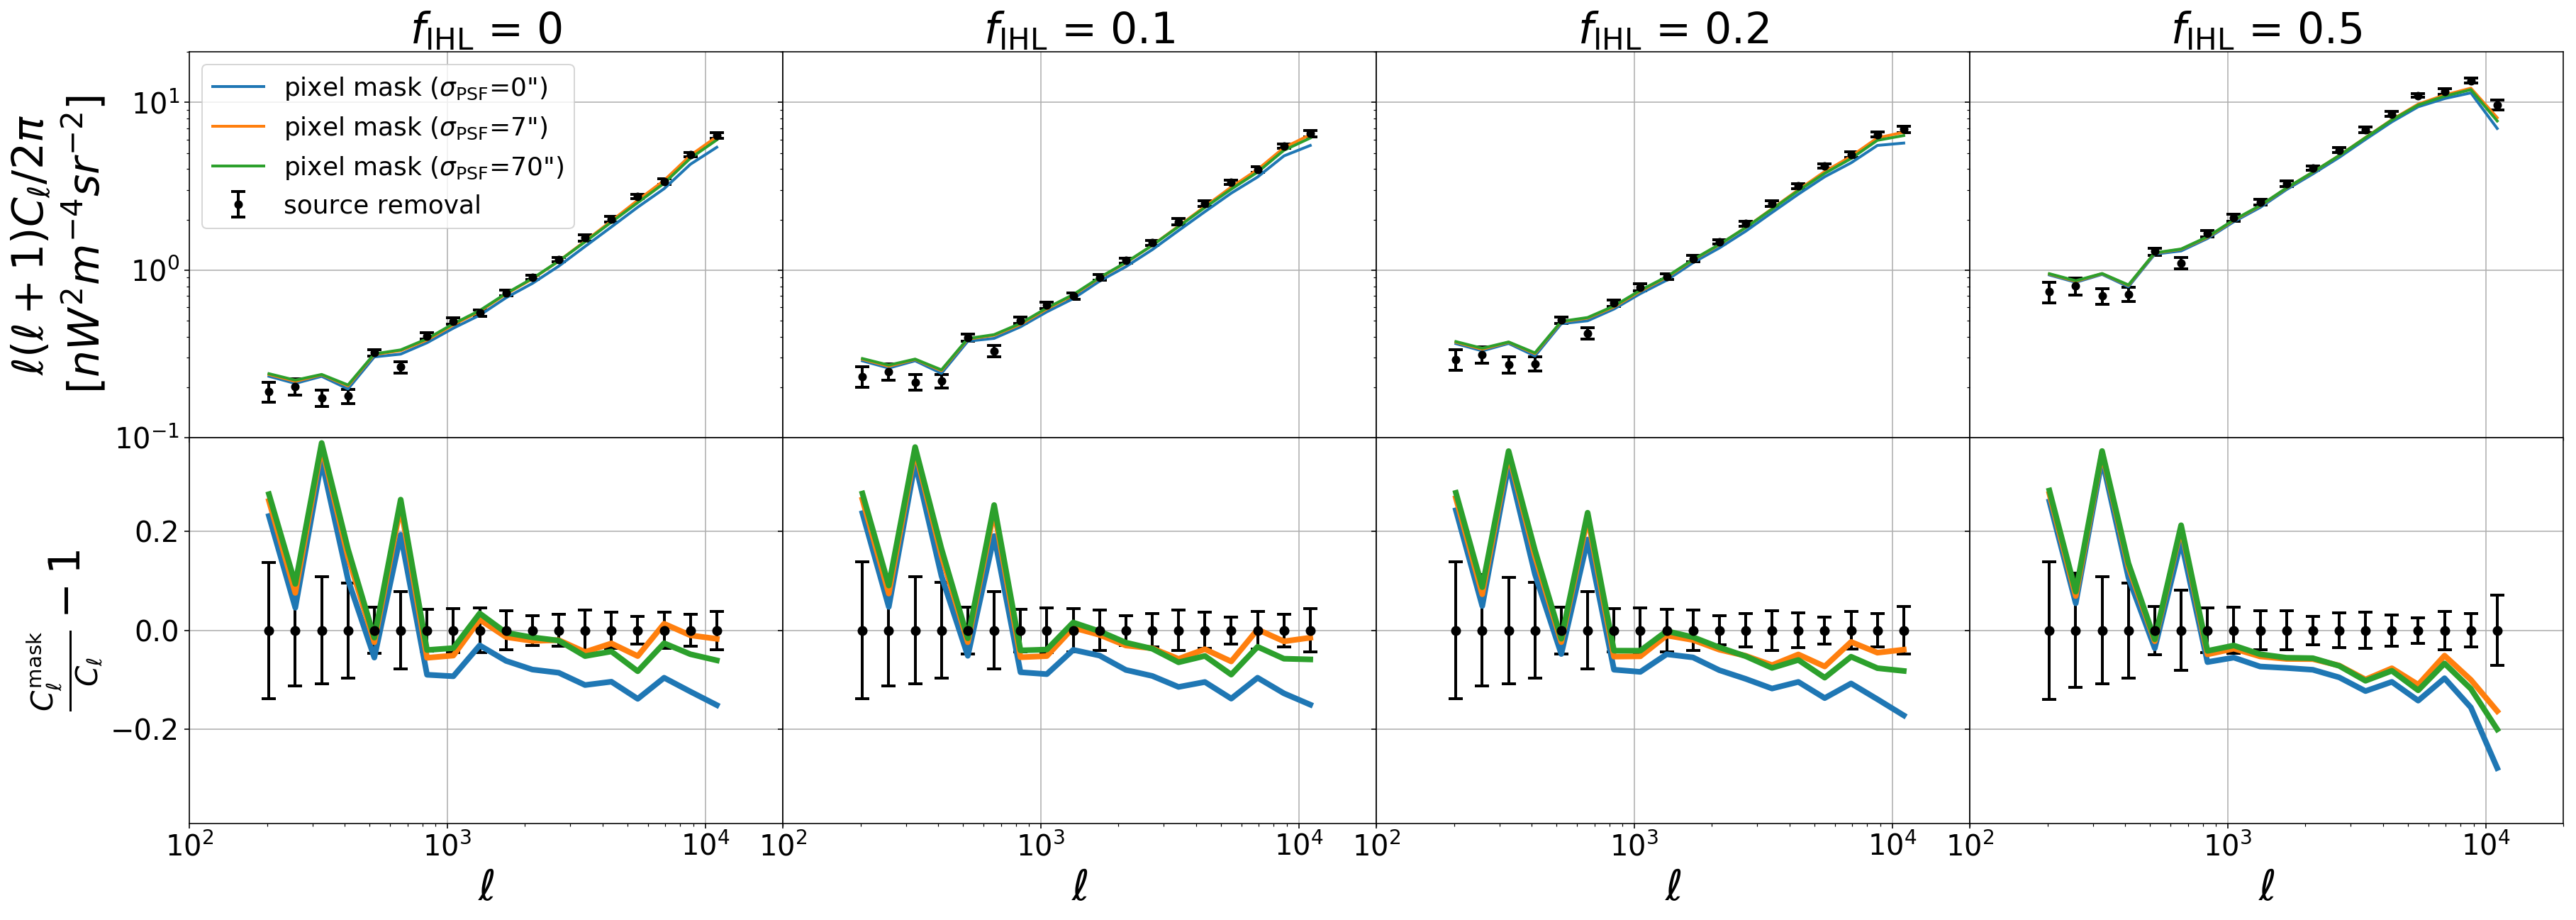

In [67]:
m_th = 18

fig, ax = plt.subplots(2,4,figsize=(30,10))
for i,f_IHL in enumerate([0,0.1,0.2,0.5]):
    Nfields = len(ra_arr)
    r_IHL = f_IHL / (1 - f_IHL)

    Cl_data = {}
    fname = mypaths['ciberdir']+'python_ciber/stack_modelfit/micecat_IHL_data/'\
    +'micecat_IHL_Cl_data_ra{}_dec{}_mth{}_mkk.pkl'.format(ra_arr[0], dec_arr[0], m_th)
    with open(fname, "rb") as f:
        Cl_datai = pickle.load(f)

    Cl_data['l'] = Cl_datai['l']
    Cl_data['Cla'] = np.zeros((Nfields, len(Cl_data['l'])))
    Cl_data['Cla_shsub'] = np.zeros((Nfields, len(Cl_data['l'])))
    Cl_data['Clam0'] = np.zeros((Nfields, len(Cl_data['l'])))
    Cl_data['Clam0_shsub'] = np.zeros((Nfields, len(Cl_data['l'])))
    Cl_data['Clam1'] = np.zeros((Nfields, len(Cl_data['l'])))
    Cl_data['Clam1_shsub'] = np.zeros((Nfields, len(Cl_data['l'])))
    Cl_data['Clam2'] = np.zeros((Nfields, len(Cl_data['l'])))
    Cl_data['Clam2_shsub'] = np.zeros((Nfields, len(Cl_data['l'])))

    for ifield, (ra_cent, dec_cent) in enumerate(zip(ra_arr, dec_arr)):
        fname = mypaths['ciberdir']+'python_ciber/stack_modelfit/micecat_IHL_data/'\
        +'micecat_IHL_Cl_data_ra{}_dec{}_mth{}_mkk.pkl'.format(ra_cent, dec_cent, m_th)
        with open(fname, "rb") as f:
            Cl_datai = pickle.load(f)

        Cl_data['Cla'][ifield] = Cl_datai['Cla'] \
        + 2*r_IHL*Cl_datai['Clha_NFW_unmasked'] + r_IHL**2*Cl_datai['Clh_NFW_unmasked']

        Clash = np.mean(Cl_datai['Cla'][-3:])*(1+r_IHL)**2
        Cl_data['Cla_shsub'][ifield] = Cl_data['Cla'][ifield] - Clash

        Cl_data['Clam0'][ifield] = Cl_datai['Clpsf_mkk'][0] \
        + 2*r_IHL*Cl_datai['Clph_NFW_mkk'][0] + r_IHL**2*Cl_datai['Clh_NFW_mkk']
        Cl_data['Clam0_shsub'][ifield] = Cl_data['Clam0'][ifield] - Clash

        Cl_data['Clam1'][ifield] = Cl_datai['Clpsf_mkk'][1] \
        + 2*r_IHL*Cl_datai['Clph_NFW_mkk'][1] + r_IHL**2*Cl_datai['Clh_NFW_mkk']
        Cl_data['Clam1_shsub'][ifield] = Cl_data['Clam1'][ifield] - Clash

        Cl_data['Clam2'][ifield] = Cl_datai['Clpsf_mkk'][2] \
        + 2*r_IHL*Cl_datai['Clph_NFW_mkk'][2] + r_IHL**2*Cl_datai['Clh_NFW_mkk']
        Cl_data['Clam2_shsub'][ifield] = Cl_data['Clam2'][ifield] - Clash

    sp = np.arange(18)
    
    Nfields = 50
    l = Cl_data['l']
    Cla = np.median(Cl_data['Cla'],axis=0)
    Cla_err = (np.percentile(Cl_data['Cla'], 84, axis=0) \
               - np.percentile(Cl_data['Cla'], 16, axis=0)) / 2 / np.sqrt(Nfields)
    Cla_shsub = np.median(Cl_data['Cla_shsub'],axis=0)
    ax[0][i].errorbar(l[sp], l[sp]*(l[sp]+1)*Cla_shsub[sp]/2/np.pi, l[sp]*(l[sp]+1)*Cla_err[sp]/2/np.pi,
                    c='k', capsize=5, markersize=8, elinewidth=2, markeredgewidth=2, fmt='.',
                    label=r'source removal')

    ax[1][i].errorbar(l[sp], Cla_shsub[sp]/Cla_shsub[sp]-1, Cla_err[sp]/Cla_shsub[sp],
                    c='k', capsize=5, markersize=10, elinewidth=2, markeredgewidth=2, fmt='.')


    for ipsf,c,xoff in zip([0,1,2],['C0','C1', 'C2'],[0.98,1.02, 1.04]):
        if ipsf==0:
            sig_psf = 0
            Clam = np.mean(Cl_data['Clam0'],axis=0)
            Clam_err = np.std(Cl_data['Clam0'],axis=0) / np.sqrt(Nfields)
            Clam_err = (np.percentile(Cl_data['Clam0'], 84, axis=0) \
                       - np.percentile(Cl_data['Clam0'], 16, axis=0)) / 2 / np.sqrt(Nfields)
            Clam_shsub = np.mean(Cl_data['Clam0_shsub'],axis=0)
        elif ipsf==1:
            sig_psf = 7
            Clam = np.mean(Cl_data['Clam1'],axis=0)
            Clam_err = np.std(Cl_data['Clam1'],axis=0) / np.sqrt(Nfields)
            Clam_err = (np.percentile(Cl_data['Clam1'], 84, axis=0) \
                       - np.percentile(Cl_data['Clam1'], 16, axis=0)) / 2 / np.sqrt(Nfields)
            Clam_shsub = np.mean(Cl_data['Clam1_shsub'],axis=0)
        elif ipsf==2:
            sig_psf = 70
            Clam = np.mean(Cl_data['Clam2'],axis=0)
            Clam_err = np.std(Cl_data['Clam2'],axis=0) / np.sqrt(Nfields)
            Clam_err = (np.percentile(Cl_data['Clam2'], 84, axis=0) \
                       - np.percentile(Cl_data['Clam2'], 16, axis=0)) / 2 / np.sqrt(Nfields)
            Clam_shsub = np.mean(Cl_data['Clam2_shsub'],axis=0)

        ax[0][i].plot(l[sp], l[sp]*(l[sp]+1)*Clam_shsub[sp]/2/np.pi, c=c, lw=2, 
                         label=r'pixel mask ($\sigma_{\rm PSF}$='+"{}\")".format(sig_psf))
        ax[1][i].plot(l[sp], Clam_shsub[sp]/Cla_shsub[sp]-1,c=c, lw=4)

    ax[0][i].set_xscale('log')
    ax[0][i].set_yscale('log')
    ax[1][i].set_xscale('log')
    ax[1][i].set_yscale('linear')
    ax[1][i].set_xlabel(r'$\ell$', fontsize=30)
    
    ax[0][i].set_xlim([1e2,2e4])
    ax[0][i].set_ylim([1e-1,2e1])
    ax[1][i].set_ylim([-0.39,0.39])
    ax[1][i].set_xlim([1e2,2e4])
    ax[0][i].grid()
    ax[1][i].grid()
    ax[0][i].tick_params(labelsize=20)
    ax[1][i].tick_params(labelsize=20)
    ax[0][i].set_title(r'$f_{\rm IHL}$' + ' = {}'.format(f_IHL), fontsize=30)
ax[0][0].set_ylabel(r'$\ell(\ell+1)C_\ell/2\pi$'+'\n'+r'$[nW^{2}m^{-4} sr^{-2}]$', fontsize=30)
ax[1][0].set_ylabel(r'$\frac{C_\ell^{\rm mask}}{C_\ell}-1$', fontsize=30)
ax[0][1].tick_params(axis='y',labelleft=False)
ax[0][2].tick_params(axis='y',labelleft=False)
ax[0][3].tick_params(axis='y',labelleft=False)
ax[0][0].tick_params(axis='x',labelbottom=False)
ax[0][1].tick_params(axis='x',labelbottom=False)
ax[0][2].tick_params(axis='x',labelbottom=False)
ax[0][3].tick_params(axis='x',labelbottom=False)
ax[1][1].tick_params(axis='y',labelleft=False)
ax[1][2].tick_params(axis='y',labelleft=False)
ax[1][3].tick_params(axis='y',labelleft=False)
ax[0][0].legend(fontsize=18)
plt.subplots_adjust(wspace=0)
plt.subplots_adjust(hspace=0)
plt.savefig('plots/MICECAT_paperfig/mkk_Cl.pdf',dpi=100, bbox_inches='tight')

In [30]:
def L_IHL_z(z, logMmin=9.03, logMmax=11.91):
    Mh_binedges = np.logspace(logMmin, logMmax, 1000)
    lnMh_binedges = np.log(Mh_binedges)
    lnMh_bins = (lnMh_binedges[1:] + lnMh_binedges[:-1]) / 2
    dlnMh_bins = lnMh_binedges[1:] - lnMh_binedges[:-1]
    dndm_binedges, _ = HMFz(z).dndm(m_arr=Mh_binedges)
    dndlnm_binedges = dndm_binedges * Mh_binedges
    dndlnm_bins = np.sqrt(dndlnm_binedges[1:]*dndlnm_binedges[:-1])
    
    Af = 0.0015
    beta = 0.094
    alpha=1.23
    f_IHL_M = Af * (np.exp(lnMh_bins)/1e12)**beta
    L_M_z0 = 5.64e12 * (np.exp(lnMh_bins)/2.7e14)**0.72
    z_scale = (1+z)**alpha
    L_IHL_M_z = f_IHL_M * L_M_z0 * z_scale
    
    dL_dV = np.sum(dndlnm_bins*dlnMh_bins*L_IHL_M_z)
    return dL_dV
    
def dnuInu_dz_IHL(z, wl, logMmin=9.03, logMmax=11.91):
    
    IHL_SED_data = np.loadtxt('Z14_S25_3Gyr.txt', delimiter=',')
    wl_data, wlIwl_data = IHL_SED_data.T
    wlIwl_data, wl_data = wlIwl_data[np.argsort(wl_data)], wl_data[np.argsort(wl_data)]
    wlfwl = np.exp(np.interp(wl/(1+z), wl_data, np.log(wlIwl_data)))

    dnuLnu_dV = L_IHL_z(z, logMmin, logMmax) * wlfwl
    dchi_dz = (const.c / cosmo.H(z)).to(u.Mpc).value
    dMpc2_dsr = (cosmo.kpc_comoving_per_arcmin(z).to(u.Mpc/u.rad).value)**2
    DL = cosmo.luminosity_distance(z).value
    dnuInu_dz = dnuLnu_dV * dchi_dz * dMpc2_dsr / (4 * np.pi * DL**2) # Lsun/Mpc2/sr
    dnuInu_dz = dnuInu_dz * (u.Lsun/u.Mpc**2).to(u.nW/u.m**2) # nW/m2/sr
    
    return dnuInu_dz

def dnuInu_dz_IGL(z, wl, logMmin=9.03, logMmax=11.91):
    
#     Mh_binedges = np.logspace(5, 15, 1000)
#     lnMh_binedges = np.log(Mh_binedges)
#     lnMh_bins = (lnMh_binedges[1:] + lnMh_binedges[:-1]) / 2
#     Mh_bins = np.exp(lnMh_bins)
#     dlnMh_bins = lnMh_binedges[1:] - lnMh_binedges[:-1]
#     dndm_binedges, _ = HMFz(z).dndm(m_arr=Mh_binedges)
#     dndlnm_binedges = dndm_binedges * Mh_binedges
#     dndlnm_bins = np.sqrt(dndlnm_binedges[1:]*dndlnm_binedges[:-1])
#     Mtot = np.sum(dndlnm_bins*dlnMh_bins*Mh_bins)
#     sp = np.where((Mh_bins > 10**logMmin) & (Mh_bins < 10**logMmax))[0]
#     Mihl = np.sum(dndlnm_bins[sp]*dlnMh_bins[sp]*Mh_bins[sp])
    
    I_IGL = Helgason_model().dnuInu_dz(z, wl) #* Mihl/Mtot
    
    return I_IGL

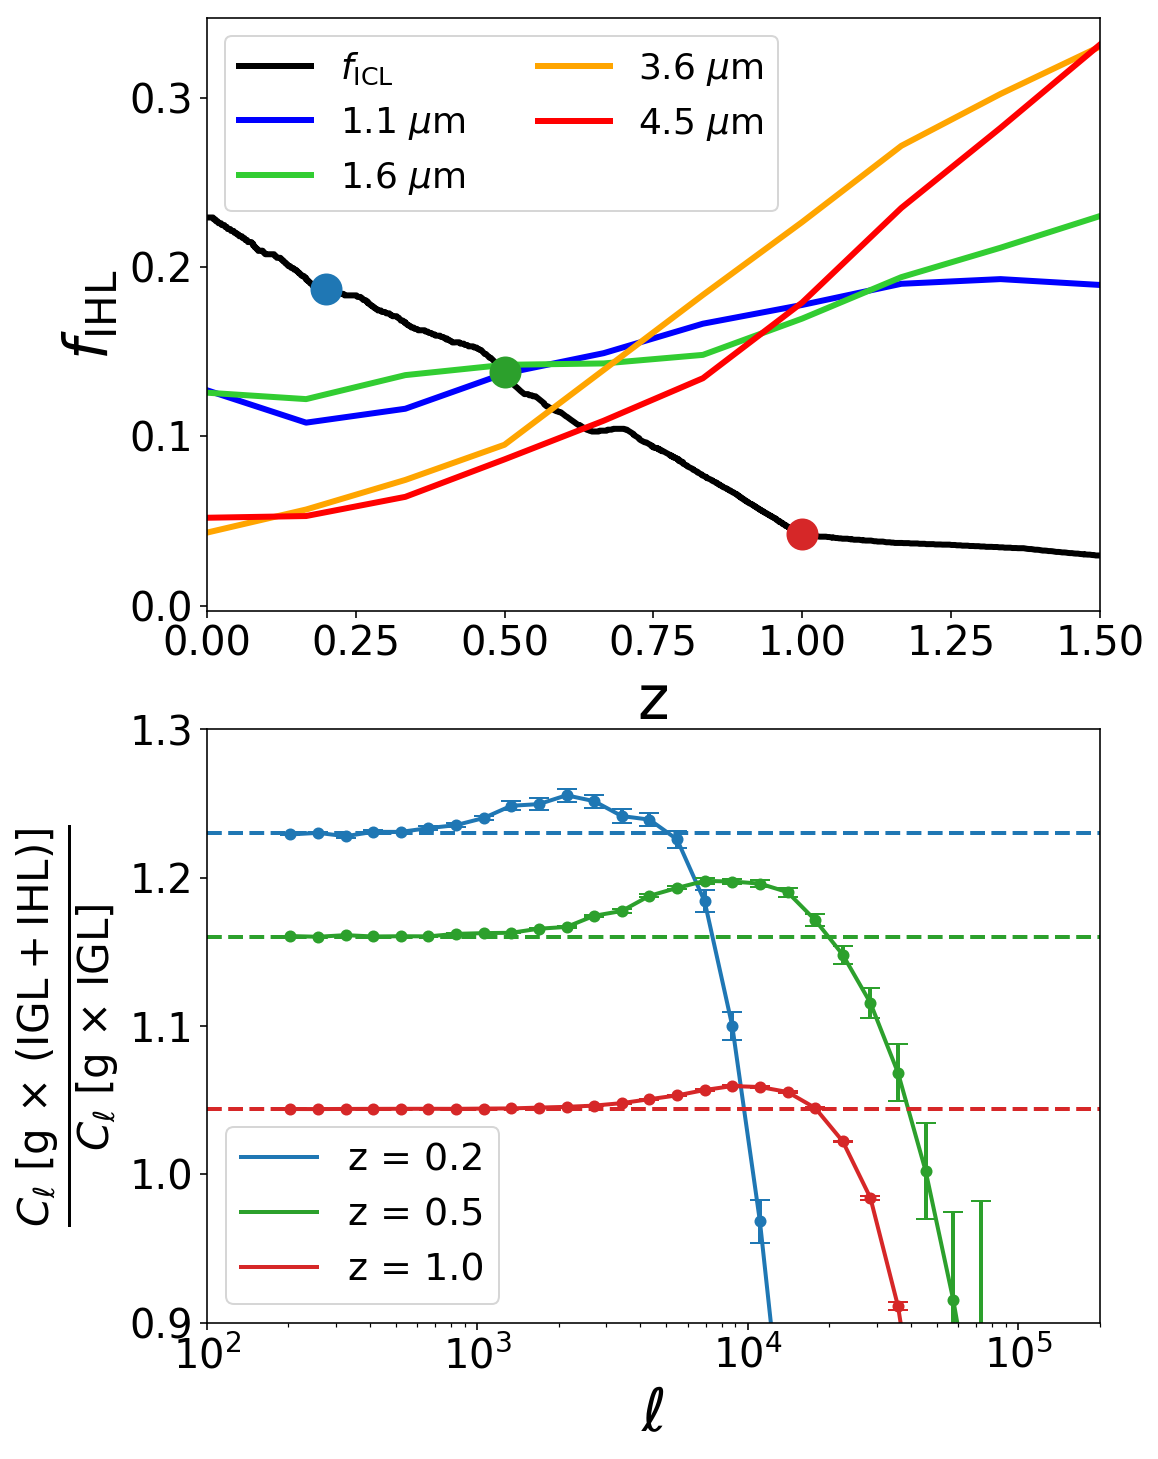

In [42]:
from micecat_field import *

m_th = 20
zg_arr = np.array([0.2, 0.5, 1.0])

fig, ax = plt.subplots(2,1,figsize=(8,12))

data = np.loadtxt('fIHL_z_Contini2018.txt', delimiter=',')
z_data = data[:,0] - 1
f_IHL_data = data[:,1]
f_IHL_data = f_IHL_data[np.argsort(z_data)]
z_data = z_data[np.argsort(z_data)]
f_IHL_plot_arr = np.interp(zg_arr, z_data, f_IHL_data)
ax[0].plot(z_data, f_IHL_data, 'k', lw=3, label=r'$f_{\rm ICL}$')
ax[0].set_xlim([0,1.5])


# z_arr = np.linspace(0,1.5,10)
# z_arr[0] = 1e-3
# f_IHL_model = {'z_arr':z_arr, 'wl_arr': [1.1, 1.6, 3.6, 4.5]}
# for wl in f_IHL_model['wl_arr']:
#     f_IHL_arr = np.zeros_like(z_arr)
#     for iz,z in enumerate(z_arr):
#         I_IGL = dnuInu_dz_IGL(z, wl)
#         I_IHL = dnuInu_dz_IHL(z, wl)
#         f_IHL_arr[iz] = I_IHL/(I_IGL+I_IHL)   
#     f_IHL_model[wl] = f_IHL_arr

z_arr = f_IHL_model['z_arr']
wl_arr = f_IHL_model['wl_arr']
for wl,c in zip(wl_arr, ['Blue','LimeGreen','Orange','Red']):
    ax[0].plot(z_arr, f_IHL_model[wl], c=c, lw=3, label='{}'.format(wl) + r' $\mu$m')

for i, (zg,f_IHL,c) in enumerate(zip(zg_arr, f_IHL_plot_arr, ['C0','C2','C3'])):
    r_IHL = f_IHL / (1 - f_IHL)

    fname = mypaths['ciberdir']+'python_ciber/stack_modelfit/micecat_IHL_data/'\
    +'micecat_cross_Cl_data_zg{}_delz{}_mth{}.pkl'.format(zg,0.03, m_th)

    with open(fname, "rb") as f:
        Cl_data = pickle.load(f)

    ax[0].plot([zg], [f_IHL],'o',c=c,markersize=15)

    l = Cl_data['l']
    Nfields = 50
    
    Clga = Cl_data['Clga']
    Clgh = Cl_data['Clgh']
    Clga_arr = np.median(Clga,axis=0) 
    Clga_err = (np.percentile(Clga,16,axis=0) - np.percentile(Clga,84,axis=0))/2/np.sqrt(Nfields)
    
    Clgh = Cl_data['Clga'] +r_IHL*Cl_data['Clgh']
    Clgh_arr= np.median(Clgh,axis=0)
    Clgh_err  = (np.percentile(Clgh,16,axis=0) - np.percentile(Clgh,84,axis=0))/2/np.sqrt(Nfields)

    Clsh = np.tile(np.mean(Clga[:,-3:],axis=1),(len(l),1)).T
    Clga -= Clsh
    Clga_arr = np.median(Clga,axis=0) 
    Clga_err = (np.percentile(Clga,16,axis=0) - np.percentile(Clga,84,axis=0))/2/np.sqrt(Nfields)

    Clsh = Clsh * (1+r_IHL)
    Clgh -= Clsh
    Clgh_arr= np.median(Clgh,axis=0) 
    Clgh_err  = (np.percentile(Clgh,16,axis=0) - np.percentile(Clgh,84,axis=0))/2/np.sqrt(Nfields)

    r_arr = np.median(Clgh/Clga,axis=0)
    r_err = (np.percentile(Clgh/Clga,16,axis=0) - np.percentile(Clgh/Clga,84,axis=0))/2/np.sqrt(Nfields)

    idx_cut = 15 if zg==0.2 else 23
    spline_fit = scipy.interpolate.UnivariateSpline(np.log(l[idx_cut-4:idx_cut]),
                                                    np.log(r_arr[idx_cut-4:idx_cut]))
    r_fit = r_arr.copy()
    r_fit[idx_cut:] = np.exp(spline_fit(np.log(l[idx_cut:])))

    ax[1].semilogx(l, r_fit, c=c, lw=2, label='z = {}'.format(zg))
    ax[1].axhline((1+r_IHL),c=c,ls='--', lw=2)
    ax[1].errorbar(l[:26], r_fit[:26], r_err[:26], c=c, #mfc='white',
               capsize=5, markersize=10, elinewidth=2, markeredgewidth=1, fmt='.')

    ax[1].legend(fontsize=19)
ax[0].legend(fontsize=18, ncol=2)
ax[0].set_ylabel(r'$f_{\rm IHL}$', fontsize=30)
ax[0].set_xlabel('z', fontsize=30)
ax[1].set_yscale('linear')
ax[1].set_ylim([0.9,1.3])
ax[1].set_xlim([1e2,2e5])
ax[0].tick_params(labelsize=20)
ax[1].tick_params(labelsize=20)
ax[1].set_xlabel(r'$\ell$', fontsize=30)
ax[1].set_ylabel(r'$\frac{C_\ell\,\,{\rm [g\, \times\, (IGL + IHL)]}}{C_\ell\,\,{\rm [g\, \times\, IGL]}}$',
                 fontsize=30)
plt.savefig('plots/MICECAT_paperfig/IHL_xcorr.pdf',dpi=100, bbox_inches='tight')

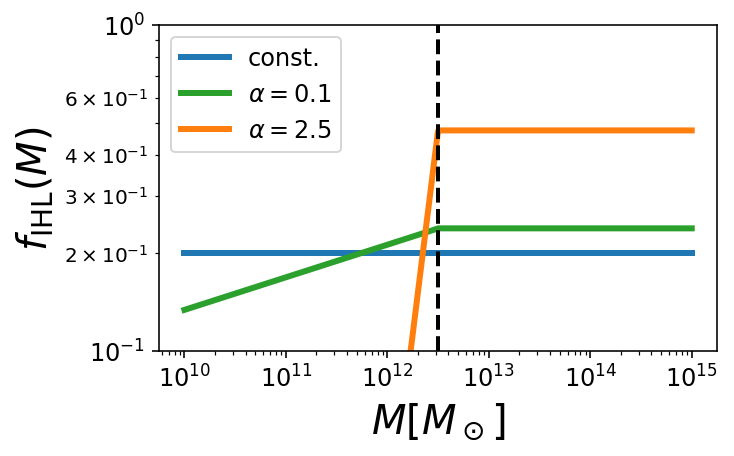

In [61]:
from micecat_field import *

zg = 0.2

Mh_arr = np.logspace(10,15,1000)
mcfield = micecat_field(2,32,Nx=1024,Ny=1024)
fig, ax = plt.subplots(1,1,figsize=(5,3))

for ialpha, (alpha,c,label) in enumerate(zip([None, 0.1, 2.5],['C0','C2','C1'],
                                             ['const.', r'$\alpha=0.1$',r'$\alpha=2.5$'])):
    if alpha is None:
        fname = mypaths['ciberdir']+'python_ciber/stack_modelfit/micecat_IHL_data/'\
        +'micecat_cross_Cl_data_zg{}_delz{}_mth{}.pkl'.format(zg,0.03, m_th)
        f_IHL = mcfield.f_IHL_const(np.log10(Mh_arr), f_IHL=1, logM_min=-np.inf)
    else:
        fname = mypaths['ciberdir']+'python_ciber/stack_modelfit/micecat_IHL_data/'\
        +'micecat_cross_Cl_data_zg{}_delz{}_mth{}_alpha{}.pkl'.format(zg,0.03, m_th, alpha)
        f_IHL = mcfield.f_IHL_purcell(np.log10(Mh_arr), alpha=alpha, f_IHL=1, logM_min=-np.inf)

    with open(fname, "rb") as f:
        Cl_data = pickle.load(f)

    Clh_scale = np.median(np.sqrt(Cl_data['Cla'][:,:5]/Cl_data['Clh'][:,:5]))
    f_IHL *= Clh_scale
    
    f_IHL *= 0.2
    
    ax.loglog(Mh_arr, f_IHL, lw=3, c=c, label=label)
ax.legend(fontsize=12)    
ax.axvline(10**12.5, c='k', ls='--', lw=2)
ax.tick_params(labelsize=12)
ax.set_ylim([1e-1,1e0])
ax.set_ylabel(r'$f_{\rm IHL} (M)$', fontsize=20)
ax.set_xlabel(r'$M[M_\odot]$', fontsize=20)

plt.savefig('plots/MICECAT_paperfig/f_IHL_M.pdf',dpi=100, bbox_inches='tight')

/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:58: RuntimeWarning: invalid value encountered in log


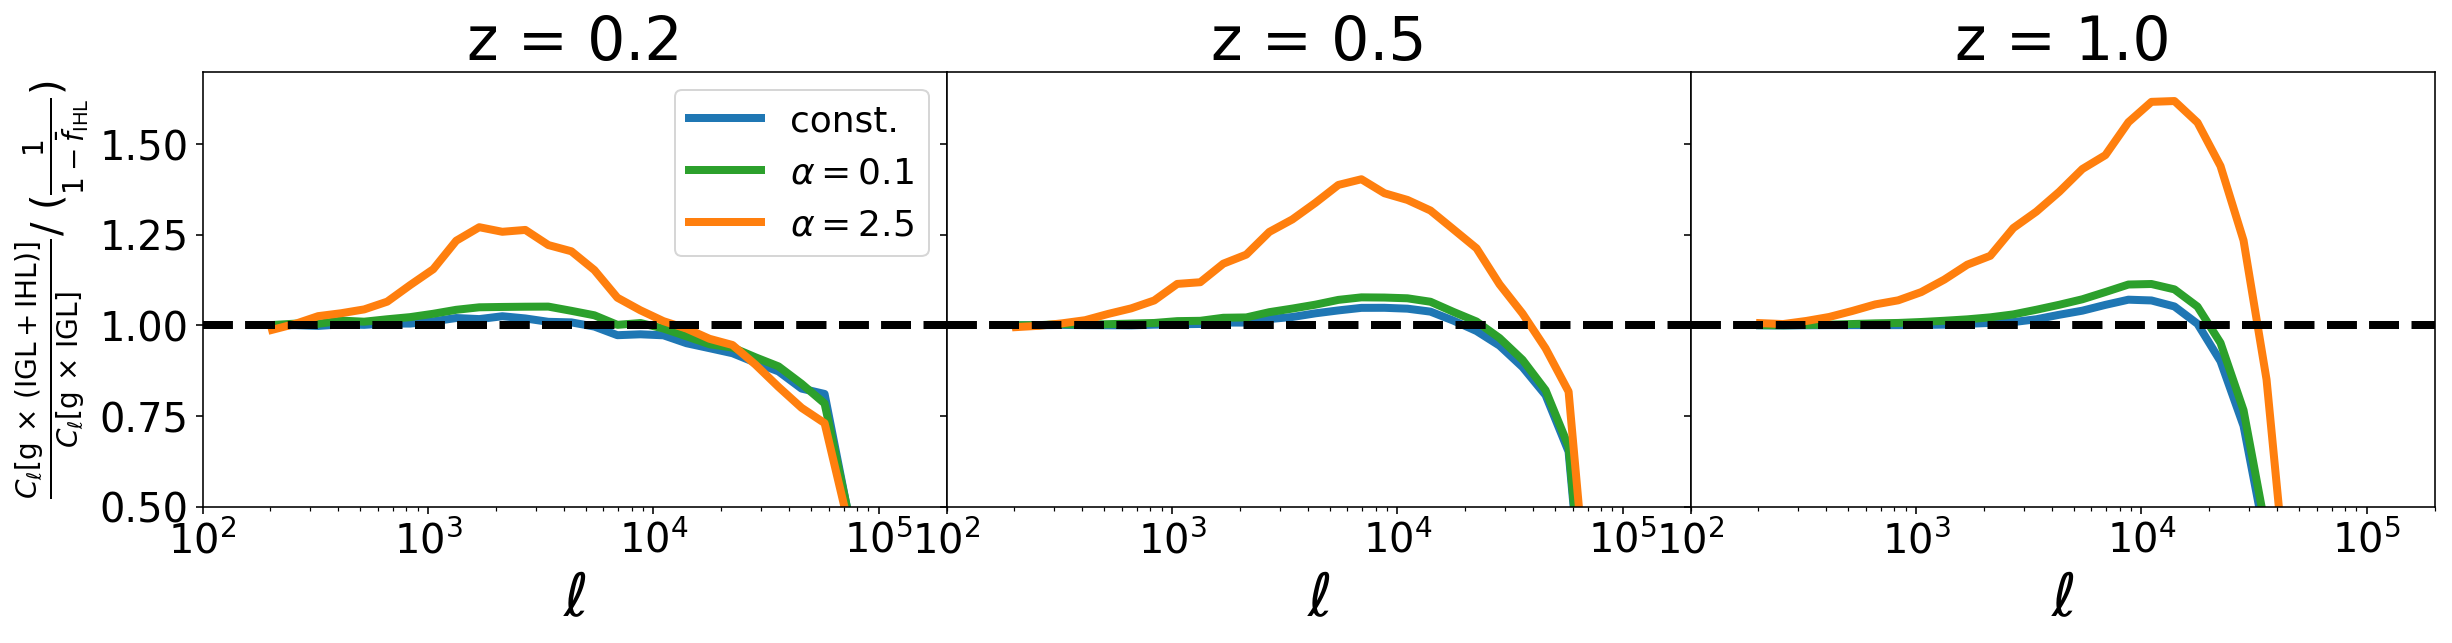

In [62]:
from micecat_field import *

m_th = 20
f_IHL = 0.2
zg_arr = np.array([0.2, 0.5, 1.0])

r_IHL = f_IHL / (1 - f_IHL)
fig, ax = plt.subplots(1,3, figsize=(20,4))

for ialpha, (alpha,c,label) in enumerate(zip([None, 0.1, 2.5],['C0','C2','C1'],
                                             ['const.', r'$\alpha=0.1$',r'$\alpha=2.5$'])):
    for iz, zg in enumerate(zg_arr):
        if alpha is None:
            fname = mypaths['ciberdir']+'python_ciber/stack_modelfit/micecat_IHL_data/'\
            +'micecat_cross_Cl_data_zg{}_delz{}_mth{}.pkl'.format(zg,0.03, m_th)
        else:
            fname = mypaths['ciberdir']+'python_ciber/stack_modelfit/micecat_IHL_data/'\
            +'micecat_cross_Cl_data_zg{}_delz{}_mth{}_alpha{}.pkl'.format(zg,0.03, m_th, alpha)

        with open(fname, "rb") as f:
            Cl_data = pickle.load(f)

        l = Cl_data['l']
        Nfields = 50
        # ==============
        Clh_scale = np.median(np.sqrt(Cl_data['Cla'][:,:1]/Cl_data['Clh'][:,:1]), axis=1)
        Clh_scale = np.tile(Clh_scale,(len(l),1)).T
        Cl_data['Clgh'] = Cl_data['Clgh'] * Clh_scale
        # ==============
        Clga = Cl_data['Clga']
        Clgh = Cl_data['Clgh']
        Clga_arr = np.median(Clga,axis=0) 
        Clga_err = (np.percentile(Clga,16,axis=0) - np.percentile(Clga,84,axis=0))/2/np.sqrt(Nfields)

        Clgh = Cl_data['Clga'] +r_IHL*Cl_data['Clgh']
        Clgh_arr= np.median(Clgh,axis=0)
        Clgh_err  = (np.percentile(Clgh,16,axis=0) - np.percentile(Clgh,84,axis=0))/2/np.sqrt(Nfields)

        Clsh = np.tile(np.mean(Clga[:,-3:],axis=1),(len(l),1)).T
        Clga -= Clsh
        Clga_arr = np.median(Clga,axis=0) 
        Clga_err = (np.percentile(Clga,16,axis=0) - np.percentile(Clga,84,axis=0))/2/np.sqrt(Nfields)

        Clsh = Clsh * (1+r_IHL)
        Clgh -= Clsh
        Clgh_arr= np.median(Clgh,axis=0) 
        Clgh_err  = (np.percentile(Clgh,16,axis=0) - np.percentile(Clgh,84,axis=0))/2/np.sqrt(Nfields)

        r_arr = np.median(Clgh/Clga,axis=0)
        r_err = (np.percentile(Clgh/Clga,16,axis=0) - np.percentile(Clgh/Clga,84,axis=0))/2/np.sqrt(Nfields)

        
        if zg==0.2:
            idx_cut = 26
        if zg==0.5:
            idx_cut = 26
        if zg==1:
            idx_cut = 26
        spline_fit = scipy.interpolate.UnivariateSpline(np.log(l[idx_cut-4:idx_cut]),
                                                        np.log(r_arr[idx_cut-4:idx_cut]))
        r_fit = r_arr.copy()
        r_fit[idx_cut:] = np.exp(spline_fit(np.log(l[idx_cut:])))
        
        ax[iz].semilogx(l, r_fit/(1+r_IHL), c=c, lw=4, label=label)
        ax[iz].axhline(1, lw=4, ls='--', c='k')
        ax[iz].set_ylim([0.5,1.7])
        ax[iz].set_xlim([1e2,2e5])
        ax[iz].tick_params(labelsize=20)
        ax[iz].set_xlabel(r'$\ell$', fontsize=30)
        ax[iz].set_title('z = {}'.format(zg), fontsize=30)
ax[0].legend(fontsize=18)
ax[0].set_ylabel(r'$\frac{C_\ell{\rm [g\, \times\, (IGL + IHL)]}}{C_\ell{\rm [g\, \times\, IGL]}}$'+\
                     r'/ $(\frac{1}{1-\bar{f}_{\rm IHL}})$',
                 fontsize=20)
ax[1].tick_params(axis='y',labelleft=False)
ax[2].tick_params(axis='y',labelleft=False)
plt.subplots_adjust(wspace=0)
plt.savefig('plots/MICECAT_paperfig/Cl_f_IHL_M.pdf',dpi=100, bbox_inches='tight')

In [18]:
def L_IHL_z(z, logMmin=9.03, logMmax=11.91):
    Mh_binedges = np.logspace(logMmin, logMmax, 1000)
    lnMh_binedges = np.log(Mh_binedges)
    lnMh_bins = (lnMh_binedges[1:] + lnMh_binedges[:-1]) / 2
    dlnMh_bins = lnMh_binedges[1:] - lnMh_binedges[:-1]
    dndm_binedges, _ = HMFz(z).dndm(m_arr=Mh_binedges)
    dndlnm_binedges = dndm_binedges * Mh_binedges
    dndlnm_bins = np.sqrt(dndlnm_binedges[1:]*dndlnm_binedges[:-1])
    
    Af = 0.0015
    beta = 0.094
    alpha=1.23
    f_IHL_M = Af * (np.exp(lnMh_bins)/1e12)**beta
    L_M_z0 = 5.64e12 * (np.exp(lnMh_bins)/2.7e14)**0.72
    z_scale = (1+z)**alpha
    L_IHL_M_z = f_IHL_M * L_M_z0 * z_scale
    
    dL_dV = np.sum(dndlnm_bins*dlnMh_bins*L_IHL_M_z)
    return dL_dV
    
def dnuInu_dz_IHL(z, wl, logMmin=9.03, logMmax=11.91):
    
    IHL_SED_data = np.loadtxt('Z14_S25_3Gyr.txt', delimiter=',')
    wl_data, wlIwl_data = IHL_SED_data.T
    wlIwl_data, wl_data = wlIwl_data[np.argsort(wl_data)], wl_data[np.argsort(wl_data)]
    wlfwl = np.exp(np.interp(wl/(1+z), wl_data, np.log(wlIwl_data)))

    dnuLnu_dV = L_IHL_z(z, logMmin, logMmax) * wlfwl
    dchi_dz = (const.c / cosmo.H(z)).to(u.Mpc).value
    dMpc2_dsr = (cosmo.kpc_comoving_per_arcmin(z).to(u.Mpc/u.rad).value)**2
    DL = cosmo.luminosity_distance(z).value
    dnuInu_dz = dnuLnu_dV * dchi_dz * dMpc2_dsr / (4 * np.pi * DL**2) # Lsun/Mpc2/sr
    dnuInu_dz = dnuInu_dz * (u.Lsun/u.Mpc**2).to(u.nW/u.m**2) # nW/m2/sr
    
    return dnuInu_dz

def dnuInu_dz_IGL(z, wl, logMmin=9.03, logMmax=11.91):
    
    Mh_binedges = np.logspace(5, 15, 1000)
    lnMh_binedges = np.log(Mh_binedges)
    lnMh_bins = (lnMh_binedges[1:] + lnMh_binedges[:-1]) / 2
    Mh_bins = np.exp(lnMh_bins)
    dlnMh_bins = lnMh_binedges[1:] - lnMh_binedges[:-1]
    dndm_binedges, _ = HMFz(z).dndm(m_arr=Mh_binedges)
    dndlnm_binedges = dndm_binedges * Mh_binedges
    dndlnm_bins = np.sqrt(dndlnm_binedges[1:]*dndlnm_binedges[:-1])
    Mtot = np.sum(dndlnm_bins*dlnMh_bins*Mh_bins)
    sp = np.where((Mh_bins > 10**logMmin) & (Mh_bins < 10**logMmax))[0]
    Mihl = np.sum(dndlnm_bins[sp]*dlnMh_bins[sp]*Mh_bins[sp])
    
    I_IGL = Helgason_model().dnuInu_dz(z, wl) #* Mihl/Mtot
    
    return I_IGL

wl = bandwl_dict['euclid_nisp_y']
for z in [1e-3,0.1,0.2,0.5,1,1.5]:
    I_IGL = dnuInu_dz_IGL(z, wl)
    I_IHL = dnuInu_dz_IHL(z, wl)
    print(z, I_IGL, I_IHL, I_IHL/(I_IGL+I_IHL))

0.001 11.868155104034773 1.724974579520195 0.12690047249435701
0.1 12.74547189253087 1.5762024782708763 0.11005713699819572
0.2 11.90096496504905 1.406916129522066 0.10572052151082191
0.5 6.743883544279926 1.073525393267641 0.13732496302085756
1 2.663469669898245 0.5834978034815185 0.17970546618200536
1.5 1.0964977097587538 0.22861091201740338 0.1725223942102018


In [26]:
# for m_th in [18]:
#     for ifield, (ra_cent, dec_cent) in enumerate(zip(ra_grid.flatten(), dec_grid.flatten())):
#         if ifield==0:
#             print("_ = run_IHL_Cl_mkk({}, {}, m_th={}, savemaps=True, PSF_Gaussian_sig_arr=[0,7,70])"\
#                   .format(ra_cent, dec_cent, m_th))
#         else:
#             print("_ = run_IHL_Cl_mkk({}, {}, m_th={}, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])"\
#                   .format(ra_cent, dec_cent, m_th))

In [ ]:
# _ = run_IHL_Cl_mkk(32, 2, m_th=18, savemaps=True, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(32, 8, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(32, 14, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(32, 20, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(32, 26, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(36, 2, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(36, 8, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(36, 14, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(36, 20, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(36, 26, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(40, 2, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(40, 8, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(40, 14, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(40, 20, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(40, 26, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(44, 2, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(44, 8, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(44, 14, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(44, 20, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(44, 26, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(48, 2, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(48, 8, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(48, 14, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(48, 20, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(48, 26, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(52, 2, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(52, 8, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(52, 14, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(52, 20, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(52, 26, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(56, 2, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(56, 8, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(56, 14, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(56, 20, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])
# _ = run_IHL_Cl_mkk(56, 26, m_th=18, savemaps=False, PSF_Gaussian_sig_arr=[0,7,70])